In [7]:
import os
os.environ['TRIDENT_BACKEND'] = 'pytorch'
import trident as T
from trident import *

In [8]:

data_provider = T.load_mnist('mnist')
data_provider.image_transform_funcs = [add_noise(0.1),normalize(127.5, 127.5)]

archive file is already existing, donnot need download again.
archive file is already existing, donnot need download again.
Mapping class_names  in en-US   success, total 10 class names added.


In [9]:
def convnet(activation='relu'):
    return Sequential(
        Conv2d((5,5),16,strides=2,auto_pad=True,activation=activation),
        Conv2d((3, 3),32, strides=2, auto_pad=True,activation=activation),
        Conv2d((3, 3), 64, strides=1, auto_pad=True,activation=activation),
        Flatten(),
        Dense(10)
    )

net1=Model(input_shape=(1,28,28),output=convnet('relu'))
net2=Model(input_shape=(1,28,28),output=convnet('p_relu'))


In [10]:
net1.with_optimizer(optimizer='Adam',lr=1e-3)\
    .with_loss(CrossEntropyLoss)\
    .with_metric(accuracy)\
    .with_regularizer('l2')

net1.summary()


CrossEntropyLoss signature:[('output', None), ('target', None)]
accuracy signature:[('output', None), ('target', None)]
--------------------------------------------------------------------------------------------------------------------------------
              Layer (type)                   Output Shape            Weight           Bias    Param #     FLOPS #   
conv2d_1                                 [-1, 16, 14, 14]      [16, 1, 5, 5]                  400       156604.0    
conv2d_2                                 [-1, 32, 7, 7]        [32, 16, 3, 3]                 4608      451535.0    
conv2d_3                                 [-1, 64, 7, 7]        [64, 32, 3, 3]                 18432     1806287.0   
flatten_1                                [-1, 3136]                                           0         0.0         
dense_1                                  [-1, 10]              [10, 3136]           [10]      31370     62729.0     
Total params: 54,810
Trainable params: 54,810
Non

In [11]:
net2.with_optimizer(optimizer='Adam',lr=1e-3)\
    .with_loss(CrossEntropyLoss)\
    .with_metric(accuracy)\
    .with_regularizer('l2')

net2.summary()

CrossEntropyLoss signature:[('output', None), ('target', None)]
accuracy signature:[('output', None), ('target', None)]
--------------------------------------------------------------------------------------------------------------------------------
              Layer (type)                   Output Shape            Weight           Bias    Param #     FLOPS #   
p_relu_1                                 [-1, 16, 14, 14]      [1]                            1         196.0       
conv2d_1                                 [-1, 16, 14, 14]      [16, 1, 5, 5]                  400       156604.0    
p_relu_2                                 [-1, 32, 7, 7]        [1]                            1         49.0        
conv2d_2                                 [-1, 32, 7, 7]        [32, 16, 3, 3]                 4608      451535.0    
p_relu_3                                 [-1, 64, 7, 7]        [1]                            1         49.0        
conv2d_3                                 [-1, 64,

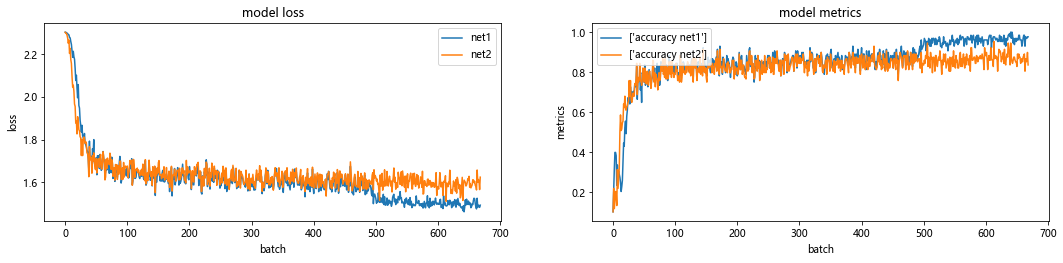

net1         Step: 2s242ms  | Loss: 1.493   | accuracy: 97.031%  | learning rate: 1.000e-03 | epoch: 1  ( 200/469 )
net2         Step: 32ms     | Loss: 1.599   | accuracy: 86.406%  | learning rate: 1.000e-03 | epoch: 1  ( 200/469 )
net1         Step: 951ms    | Loss: 1.501   | accuracy: 96.094%  | learning rate: 1.000e-03 | epoch: 1  ( 210/469 )
net2         Step: 38ms     | Loss: 1.589   | accuracy: 87.422%  | learning rate: 1.000e-03 | epoch: 1  ( 210/469 )
net1         Step: 1s39ms   | Loss: 1.502   | accuracy: 96.016%  | learning rate: 1.000e-03 | epoch: 1  ( 220/469 )
net2         Step: 35ms     | Loss: 1.589   | accuracy: 87.188%  | learning rate: 1.000e-03 | epoch: 1  ( 220/469 )
net1         Step: 1s57ms   | Loss: 1.505   | accuracy: 95.859%  | learning rate: 1.000e-03 | epoch: 1  ( 230/469 )
net2         Step: 40ms     | Loss: 1.604   | accuracy: 86.016%  | learning rate: 1.000e-03 | epoch: 1  ( 230/469 )
net1         Step: 1s4ms    | Loss: 1.499   | accuracy: 96.406%  | learn

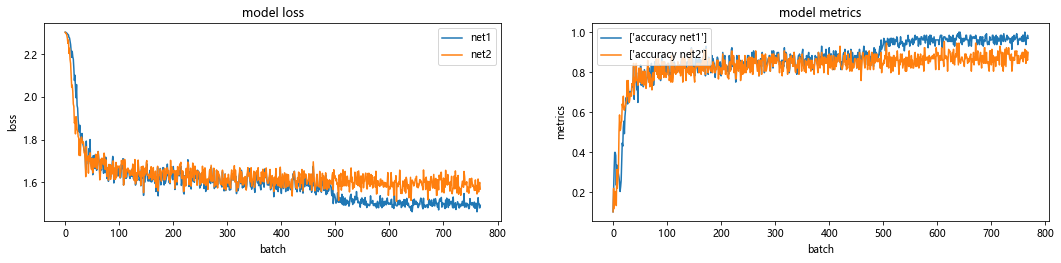

net1         Step: 2s186ms  | Loss: 1.494   | accuracy: 96.953%  | learning rate: 1.000e-03 | epoch: 1  ( 300/469 )
net2         Step: 29ms     | Loss: 1.577   | accuracy: 88.438%  | learning rate: 1.000e-03 | epoch: 1  ( 300/469 )
net1         Step: 908ms    | Loss: 1.484   | accuracy: 97.812%  | learning rate: 1.000e-03 | epoch: 1  ( 310/469 )
net2         Step: 32ms     | Loss: 1.584   | accuracy: 87.891%  | learning rate: 1.000e-03 | epoch: 1  ( 310/469 )
net1         Step: 1s30ms   | Loss: 1.484   | accuracy: 98.047%  | learning rate: 1.000e-03 | epoch: 1  ( 320/469 )
net2         Step: 31ms     | Loss: 1.579   | accuracy: 88.359%  | learning rate: 1.000e-03 | epoch: 1  ( 320/469 )
net1         Step: 1s38ms   | Loss: 1.493   | accuracy: 96.719%  | learning rate: 1.000e-03 | epoch: 1  ( 330/469 )
net2         Step: 29ms     | Loss: 1.538   | accuracy: 92.422%  | learning rate: 1.000e-03 | epoch: 1  ( 330/469 )
net1         Step: 1s361ms  | Loss: 1.493   | accuracy: 97.188%  | learn

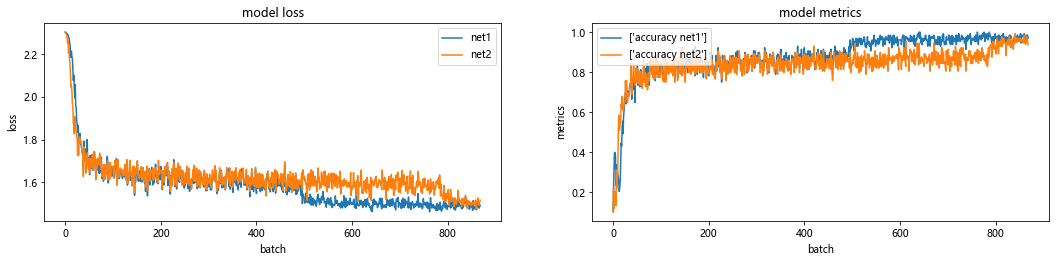

net1         Step: 2s274ms  | Loss: 1.488   | accuracy: 97.578%  | learning rate: 1.000e-03 | epoch: 1  ( 400/469 )
net2         Step: 34ms     | Loss: 1.506   | accuracy: 95.703%  | learning rate: 1.000e-03 | epoch: 1  ( 400/469 )
net1         Step: 942ms    | Loss: 1.490   | accuracy: 97.578%  | learning rate: 1.000e-03 | epoch: 1  ( 410/469 )
net2         Step: 39ms     | Loss: 1.505   | accuracy: 95.781%  | learning rate: 1.000e-03 | epoch: 1  ( 410/469 )
net1         Step: 1s71ms   | Loss: 1.493   | accuracy: 96.797%  | learning rate: 1.000e-03 | epoch: 1  ( 420/469 )
net2         Step: 36ms     | Loss: 1.504   | accuracy: 95.781%  | learning rate: 1.000e-03 | epoch: 1  ( 420/469 )
net1         Step: 1s81ms   | Loss: 1.492   | accuracy: 97.266%  | learning rate: 1.000e-03 | epoch: 1  ( 430/469 )
net2         Step: 38ms     | Loss: 1.513   | accuracy: 94.766%  | learning rate: 1.000e-03 | epoch: 1  ( 430/469 )
net1         Step: 1s115ms  | Loss: 1.496   | accuracy: 96.484%  | learn

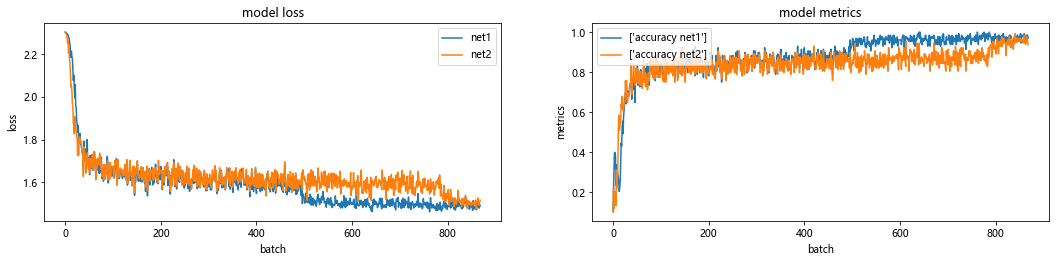

In [12]:
plan=TrainingPlan()\
    .add_training_item(net1,name='net1')\
    .add_training_item(net2,name='net2')\
    .with_data_loader(data_provider)\
    .repeat_epochs(2)\
    .within_minibatch_size(128)\
    .print_progress_scheduling(10,unit='batch')\
    .display_loss_metric_curve_scheduling(100,unit='batch',imshow=True)

plan.start_now()
